In [1]:
import numpy as np
import matplotlib.pyplot as plt

from argosim.imaging_utils import *

In [2]:
beam_dir = '../configs/beams/dish_RealG_patterns/'
freq_list = ['1', '1_5', '2', '2_5', '3']
freq_np = np.array([1., 1.5, 2., 2.5, 3.])
n_freq = len(freq_list)

beam_list_db = [np.loadtxt(beam_dir + 'dish_RealG_pattern_{}GHz.txt'.format(f)) for f in freq_list]

In [3]:
# Normalise the beams
norm_beam_list_db = [beam - np.array([0., np.max(beam[:,1])]) for beam in beam_list_db]
# Beam gain in linear scale
norm_beam_list_gain = [10**(beam[:,1]/20) for beam in norm_beam_list_db]
# Append linear scale gain to the beam data
norm_beam_list = [np.column_stack((beam, gain)) for beam, gain in zip(norm_beam_list_db, norm_beam_list_gain)]

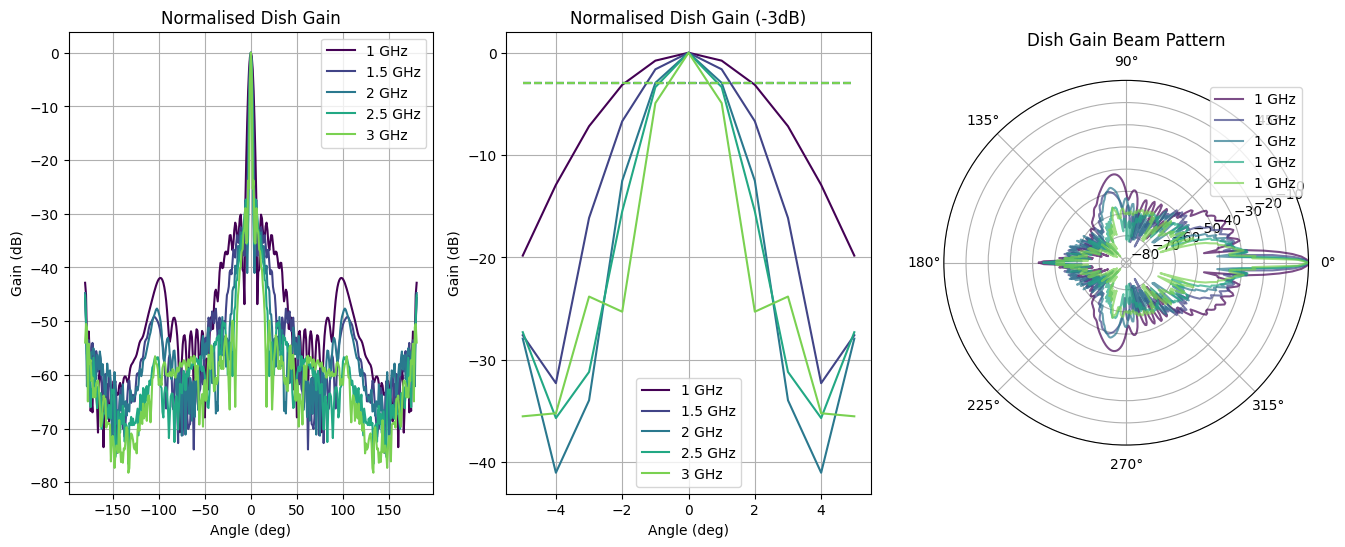

In [4]:
cmap = plt.get_cmap('viridis')
freq_labels = ['1 GHz', '1.5 GHz', '2 GHz', '2.5 GHz', '3 GHz']

# Plot the beam
fig= plt.figure(figsize=(16,6))
ax = [plt.subplot(1,3,1), plt.subplot(1,3,2), plt.subplot(1,3,3, polar=True)]

bm_centre = norm_beam_list[0].shape[0]//2
bm_width = 5
for i, beam in enumerate(norm_beam_list):
    color_ = cmap(i/n_freq)
    ax[0].plot(beam[:,0], beam[:,1], label=freq_labels[i], color=color_)
    ax[1].plot(beam[bm_centre-bm_width:bm_centre+bm_width+1 ,0], beam[bm_centre-bm_width:bm_centre+bm_width+1 ,1], label=freq_labels[i], color=color_)
    ax[1].hlines(np.max(beam[:,1])-3, -5, 5, linestyle='--', color=color_)
    ax[2].plot(np.deg2rad(beam[:,0]), beam[:,1], label='1 GHz', color=color_, alpha=0.7)
ax[0].set_xlabel('Angle (deg)')
ax[0].set_ylabel('Gain (dB)')
ax[0].set_title('Normalised Dish Gain')
ax[0].legend()
ax[0].grid()

ax[1].set_xlabel('Angle (deg)')
ax[1].set_ylabel('Gain (dB)')
ax[1].set_title('Normalised Dish Gain (-3dB)')
ax[1].legend()
ax[1].grid()
# ax[1].vlines(0, -3, 40, linestyle='--', color='k')


ax[2].set_title('Dish Gain Beam Pattern')
ax[2].legend()

plt.show()

# Synthetic Primary Beam

Using the `CosCubeBeam` class from the `argosim.beam_utils` module.

In [ ]:
from argosim.beam_utils import *
beam = CosCubeBeam(c=.2, f=3., n_pix=512, fov_deg=1.73)

### Compare beam fit to the beam data

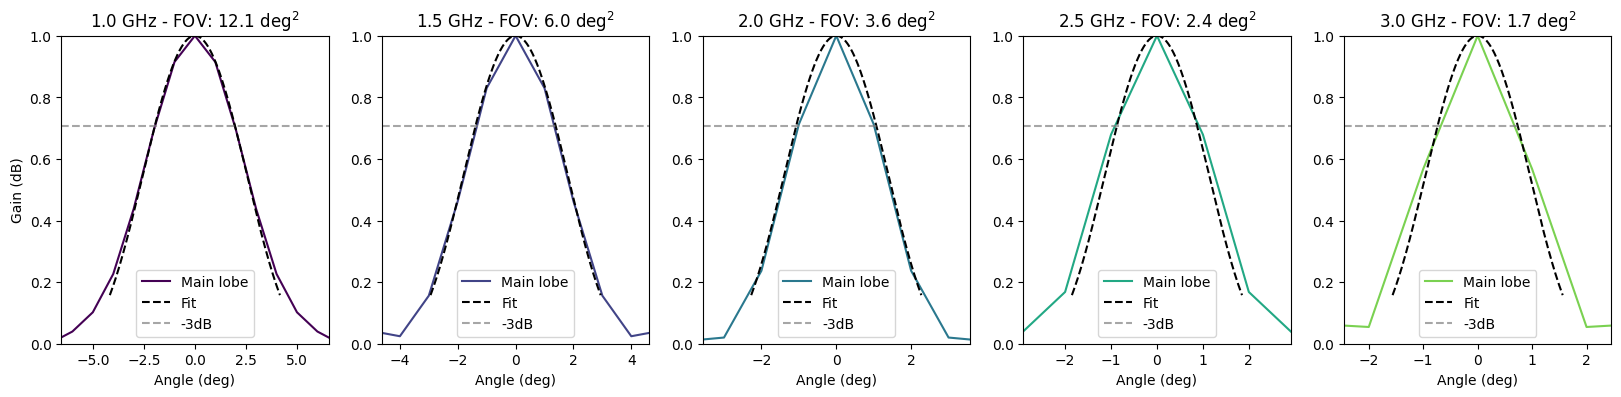

In [6]:
beam.evaluate_beam_fit(freq_np, norm_beam_list)

### Plot the beam in 1D as a function of the angle

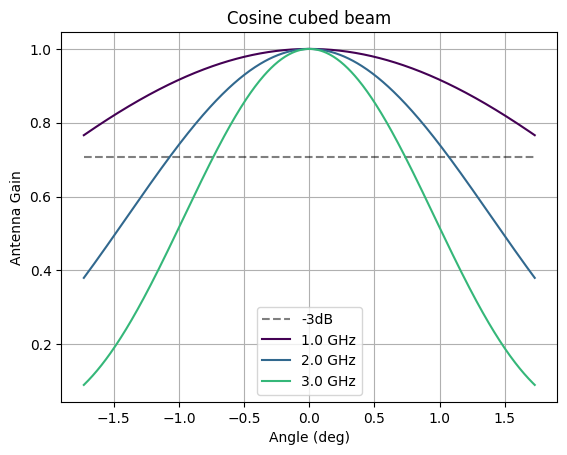

In [7]:
beam.plot_beam_1d([1., 2., 3.])

### Plot the beam in 2D

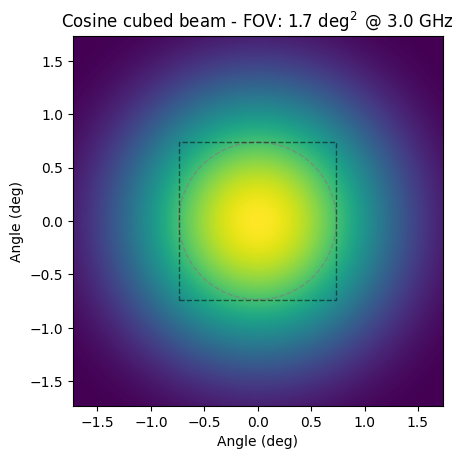

In [8]:
beam.plot_beam_2d()